# VROA intensities of methyloxirane

Here we show an example of how to calculate the VROA intensities of methyloxirane calculated with an incident wavelength of 488.9 nm.

Grab some of the resource files that we will need

In [1]:
from vibrav.base import resource
import tarfile
import os
import shutil

In [2]:
with tarfile.open(resource('nwchem-methyloxirane-vroa.tar.gz'), 'r:gz') as tar:
    tar.extractall()
parent = os.getcwd()
os.chdir('nwchem-methyloxirane-vroa')

## Run the VROA code

First import any packages that we need. Mainly just need the VROA class from vibrav.

In [3]:
from vibrav.vroa import VROA
import numpy as np

Initialize the class and print the elements in the configuration file

In [4]:
cls = VROA('va.conf')
print(cls.config.to_string())

config_elem
delta_file                 delta.dat
smatrix_file             smatrix.dat
atom_order_file       atom_order.dat
reduced_mass_file        redmass.dat
frequency_file              freq.dat
displac_a_file       [displac_a.dat]
eqcoord_file             eqcoord.dat
number_of_modes                   24
number_of_nuclei                  10
roa_file                     roa.csv
grad_file                   grad.csv
delta_disp                         0
delta_algorithm                    2
delta_value                     0.04
freqdx                            -1


Run the `vroa` method to calculate the intensities. Internally we read the ROA and gradient data from the lines in the configuration file corresponding to `roa_file` and `grad_file`. These have to be created prior to the run and are simple csv files generated by the python library, pandas.

For more information about how we parse the outputs you can refer to the tutorial on parsing the NWChem outputs using exatomic.

In [5]:
cls.vroa()

Print the VROA intensities and other pertinent information

In [6]:
cls.scatter

,freq,freqdx,beta_g*1e6,beta_A*1e6,alpha_g*1e6,backscatter,forwardscatter,exc_freq,exc_idx
0,200.247393,0,3.656216,-0.273074,0.040271,0.000342,0.000092,488.9,0
1,354.450962,1,-35.948619,-4.790522,-0.202244,-0.003604,-0.000644,488.9,0
2,398.589617,2,2.472626,4.730142,-1.325064,0.000389,-0.000990,488.9,0
3,719.359726,3,132.090769,38.915333,2.796307,0.013926,0.003504,488.9,0
4,798.974164,4,-170.470297,-21.596906,-1.259120,-0.017056,-0.003289,488.9,0
5,875.765502,5,-179.496773,-85.647522,0.856508,-0.019972,-0.000885,488.9,0
6,930.279028,6,43.652907,13.460119,4.053168,0.004621,0.003401,488.9,0
7,1007.463980,7,42.888944,22.644693,1.396536,0.004842,0.001329,488.9,0
8,1090.810610,8,-20.942816,-10.046244,-1.407385,-0.002332,-0.001188,488.9,0
9,1111.217660,9,111.839344,10.336868,0.211851,0.011067,0.001777,488.9,0


## Plot the calculated intensities

We use a full-width at half-maximum of 20 wavenumbers.

For this example we use 'atomic' units where the calculated VROA units are in $\unicode{xC5}^4/\text{amu}$

Set up the lineshape function

In [7]:
def lorentz(omega, omega_0, fwhm):
    return (1/np.pi) * 05.*fwhm / ((omega-omega_0)**2 + 0.25*fwhm**2)

In [8]:
x = np.linspace(0, 1800, 1000)
y = np.zeros(1000)
arr = zip(cls.scatter['freq'], cls.scatter['forwardscatter'])
for omega_0, inten in arr:
    y += lorentz(omega=x, omega_0=omega_0, fwhm=20)*inten

In [9]:
import matplotlib.pyplot as plt

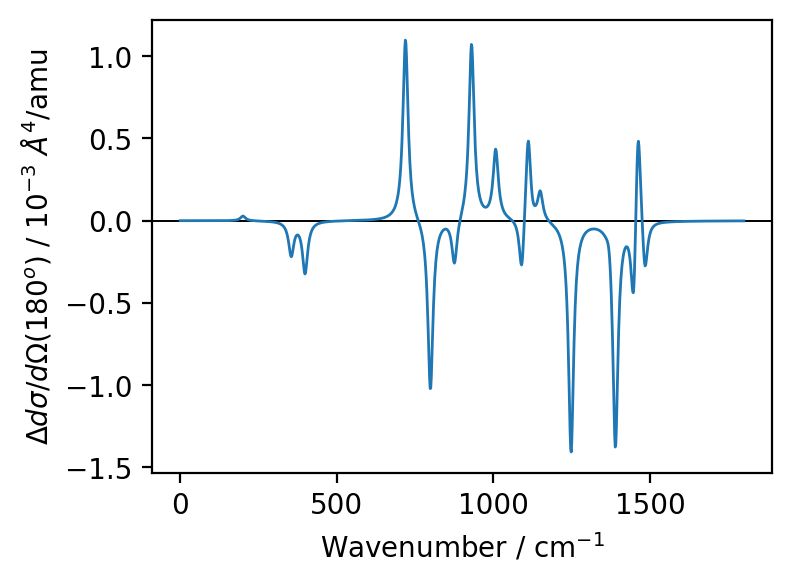

In [10]:
fig = plt.figure(figsize=(4,3), dpi=200)
ax = fig.add_subplot(111)
ax.axhline(0, color='k', linewidth=0.7)
ax.plot(x, 1e3*y, linewidth=1.0)
ax.set_xlabel('Wavenumber / cm$^{-1}$')
ax.set_ylabel(r"$\Delta d\sigma/d\Omega\left(180^{o}\right)$ / $10^{-3}~\AA^{4}$/amu")
plt.show()

Clean up the resource files

In [11]:
os.chdir(parent)
shutil.rmtree('nwchem-methyloxirane-vroa')